In [1]:
#importing libraries

import numpy as np # to work with maths
import pandas as pd # to work with datasets
import matplotlib.pyplot as plt # to plot parameters 
import seaborn as sns #Graph library that use matplot in background

In [5]:
# Loading data

dfloan = pd.read_csv('D:\Case Study\Lending Club Assignment\loan.csv')

dfloan.head()

C:\Users\Debabrata\AppData\Local\Temp\ipykernel_32332\3949643186.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfloan = pd.read_csv('D:\Case Study\Lending Club Assignment\loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# checking missing value counts

dfloan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:

# Finding the percentage of missing values in all columns

round(dfloan.isnull().mean()*100,2).sort_values(ascending = False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [8]:
# Data cleaning

# Removing all the columns with more than 30% nulls values/Keeping all of them with <= 30% null values

dfloan = dfloan.loc[:,dfloan.isnull().mean()<=0.3]
dfloan.shape

(39717, 53)

In [9]:
dfloan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

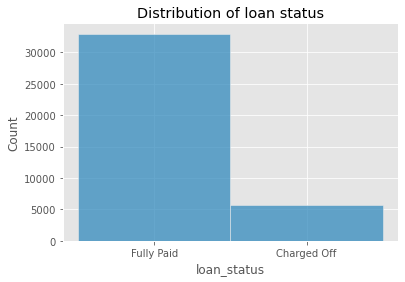

In [73]:
# histogram of loan status
plt.style.use('ggplot')
sns.histplot(dfloan.loan_status)
plt.title('Distribution of loan status')
plt.show()

In [16]:
# Now we need to drop the loan types marked as 'Current' ,so they are neither defaulters nor non-defaulters


dfloan= dfloan[dfloan['loan_status']!='Current']
dfloan.shape

(38577, 53)

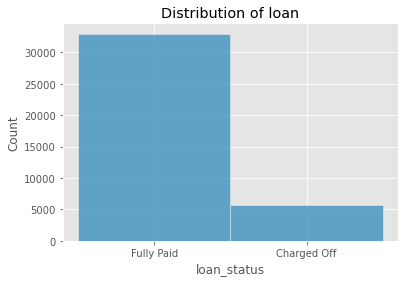

In [17]:
# histogram of loan status
plt.style.use('ggplot')
sns.histplot(dfloan.loan_status)
plt.title('Distribution of loan')
plt.show()

In [ ]:
# Now we will be creating a new column as 'Target' to mark the non-defaulters=0 and defaulters=1 

In [18]:
dfloan['Target'] = dfloan.loan_status.apply(lambda x:0 if x=='Fully Paid' else 1)

dfloan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Target
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,0
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,0
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,0
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,0


In [19]:
dfloan.shape

(38577, 54)

In [20]:
# Number of non-defaulters

Count1 = (dfloan.Target==0).sum()
Count1

32950

In [21]:
# Number of defaulters or charged-off

Count2 = (dfloan.Target==1).sum()
Count2

5627

In [22]:
# percentage of defaulters

print('Percentage of defaulters: ', Count2 * 100/(Count1+Count2))

Percentage of defaulters:  14.586411592399616


# Univeriate Analysis


In [ ]:
# Numerical analysis

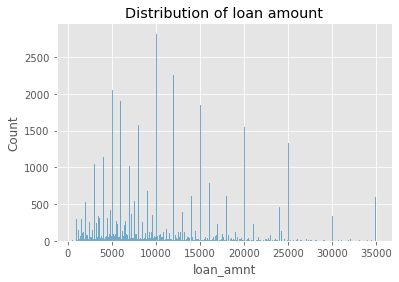

In [30]:
# Histogram of loan amount

plt.style.use('ggplot')
sns.histplot(dfloan.loan_amnt, binwidth=100)
plt.title('Distribution of loan amount')
plt.show()

C:\Users\Debabrata\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


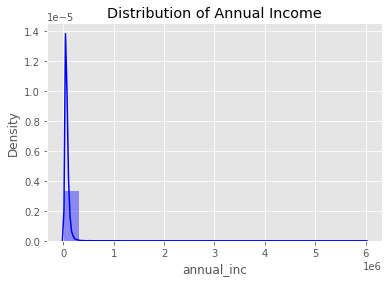

In [43]:
# Histogram of Annual Income

plt.style.use('ggplot')
sns.distplot(dfloan.annual_inc, bins =20, color='blue')
plt.title('Distribution of Annual Income')
plt.show()

In [49]:
# Converting interest rate percentage to float

dfloan.int_rate = dfloan.int_rate.str.rstrip('%').astype(float)/100

dfloan.int_rate

0        0.1065
1        0.1527
2        0.1596
3        0.1349
5        0.0790
          ...  
39712    0.0807
39713    0.1028
39714    0.0807
39715    0.0743
39716    0.1375
Name: int_rate, Length: 38577, dtype: float64

C:\Users\Debabrata\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


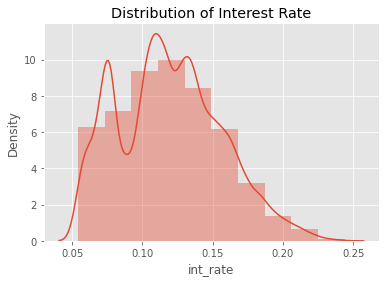

In [52]:
# Graph of Interest Rate

plt.style.use('ggplot')
sns.distplot(dfloan.int_rate, bins=10)
plt.title('Distribution of Interest Rate')
plt.show()

In [53]:
# Catergorical analysis

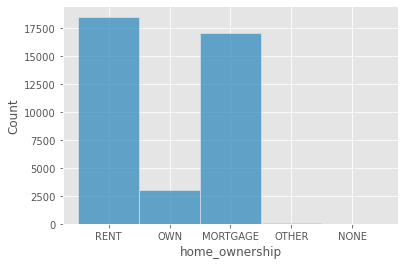

In [55]:
#Graph of homeownership, which will inform that the borrower are highly from from which category

sns.histplot(dfloan.home_ownership)
plt.show()

# Biveriate Analysis

In [ ]:
# The comparison between home ownership and loan status

# ignore the warnings

C:\Users\Debabrata\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


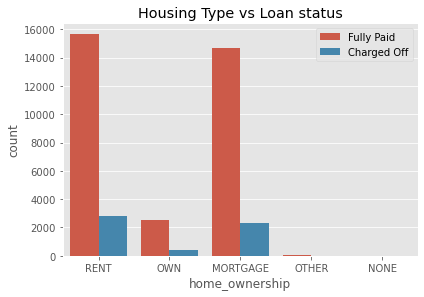

In [57]:
plt.figure()
sns.countplot(dfloan.home_ownership, hue=dfloan.loan_status)
plt.tight_layout()
plt.title("Housing Type vs Loan status")
plt.legend()
plt.show()

In [ ]:
# comparison between Employee length and loan status

#ignore the warnings

C:\Users\Debabrata\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


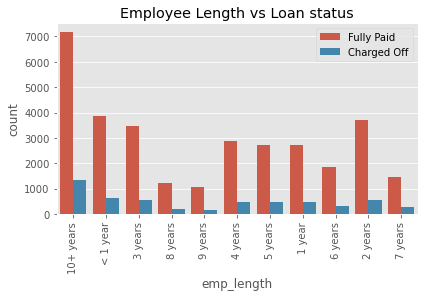

In [60]:
plt.figure()
sns.countplot(dfloan.emp_length, hue=dfloan.loan_status)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Employee Length vs Loan status")
plt.legend()
plt.show()

In [ ]:
#comparison for loan grades vs loan status

# ignore the warnings

C:\Users\Debabrata\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


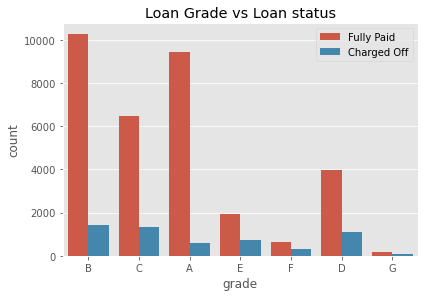

In [63]:
plt.figure()
sns.countplot(dfloan.grade, hue=dfloan.loan_status)
plt.tight_layout()
plt.title("Loan Grade vs Loan status")
plt.legend()
plt.show()

In [ ]:
# Comparison of annual income vs loan status 

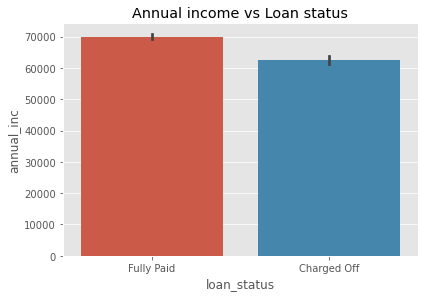

In [65]:
plt.figure()
sns.barplot(data=dfloan, x="loan_status", y="annual_inc")
plt.tight_layout()
plt.title("Annual income vs Loan status")

plt.show()

In [ ]:
# Scatterplot for annual income vs loan amount

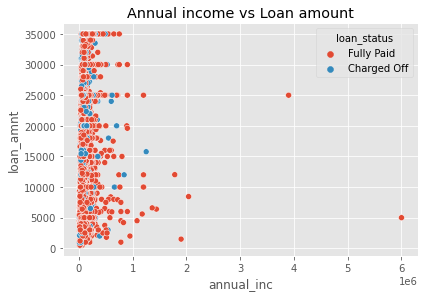

In [66]:
plt.figure()
sns.scatterplot(data=dfloan, x="annual_inc", y="loan_amnt", hue="loan_status")
plt.tight_layout()
plt.title("Annual income vs Loan amount")
plt.show()

In [ ]:
# purpose of loan vs loan status

C:\Users\Debabrata\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


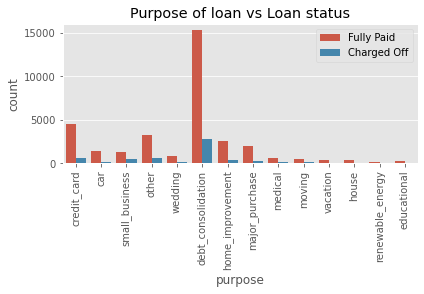

In [68]:
plt.figure()
sns.countplot(dfloan.purpose, hue=dfloan.loan_status)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Purpose of loan vs Loan status")
plt.legend()
plt.show()

# Summary

1) This data is highly imbalanced as number of defaulter is very less in total


2) Housing: Most of the applicants live in rented house

3) Purpose of Loan: Most of the applicants are taking loan to repay an existing loan

4) Employee length: Employees who are working greater than equal to 10 years are the one who are non defaulters in nature


5) Annual Income: Higher the income, higher is the chance of repaying the loan